In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANDO LOS DATOS

In [2]:
#Importando Tercera Hoja de Excel
data= pd.read_excel("Documentacion_DRP.xlsx", sheet_name="ComeRicoPay")
data.head(3)

,Ms,Tier,Squad,Tribus,DRP,Prueba DRP
0,rpp-integration-cobis-transaction-api-co,Tier1,Core Integration,Banking Account,Si,NaN
1,rpp-integration-cobis-credit-note-ms-co,Tier1,Core Integration,Banking Account,Si,NaN
2,rpp-integration-cobis-debit-note-ms-co,Tier1,Core Integration,Banking Account,Si,NaN


In [3]:
#Rellenando las columnas Vacias Con "No" en la columna DRP
data["DRP"].fillna("No",inplace=True)

### Analizando los datos

In [4]:
#data["Ms "].value_counts()
#data[" Tier "].value_counts()
#data["Squad"].value_counts()
#data["Tribus"].value_counts()
#data["DRP"].value_counts()
#data["Prueba DRP"].value_counts()


-----------------

# Graficando Datos

## TIER

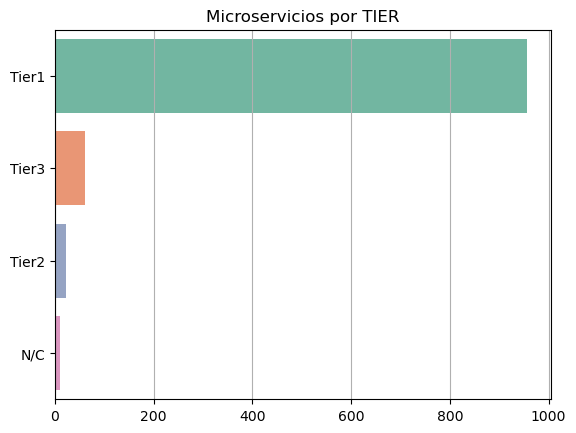

In [11]:
sns.countplot(data=data, y=" Tier ", 
              order = data[" Tier "].value_counts().index,)
sns.set_palette("Set2")
plt.title("Microservicios por TIER")
plt.xlabel("")
plt.ylabel(None)
plt.grid(axis="x")
plt.show()

---------------

## Areas

In [6]:
#Seleccionando datos Areas sin DRP
datos = data[data["DRP"]=="No"][["Tribus","DRP"]]
#datos

## Areas sin DRP

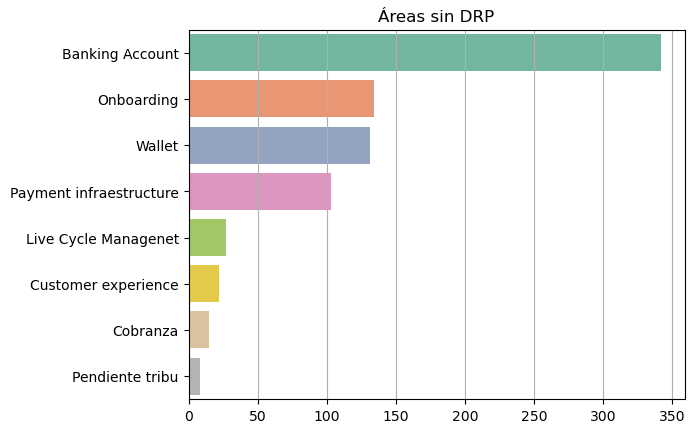

In [12]:

sns.countplot(data=datos, y="Tribus", 
              order = datos["Tribus"].value_counts().index,)
plt.title("Áreas sin DRP")
plt.xlabel("")
plt.grid(axis="x")
plt.ylabel(None)
plt.show()

## Equipos sin DRP

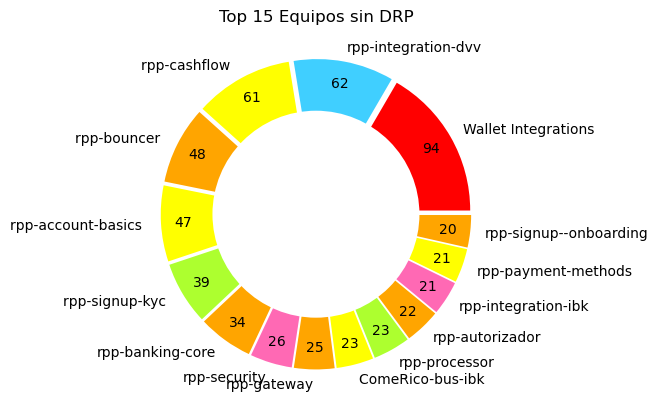

In [8]:
frecuencias = data[data["DRP"]=="No"]["Squad"].value_counts()[0:15]
etiquetas = ["Wallet Integrations", "rpp-integration-dvv", "rpp-cashflow ", "rpp-bouncer ", "rpp-account-basics ",
            "rpp-signup-kyc ", "rpp-banking-core", "rpp-security", "rpp-gateway", "ComeRico-bus-ibk ",
            "rpp-processor","rpp-autorizador", "rpp-integration-ibk", "rpp-payment-methods", "rpp-signup--onboarding"]

##GRAFICO DE ANILLOS

#Datos
  
# configuraciones
colors = ['#FF0000', '#40cfff', '#FFFF00','#FFA500',"#FFFF00", 
          '#ADFF2F', '#FFA500', '#ff69b4', "#FFA500", '#FFFF00',
         '#ADFF2F', '#FFA500', '#ff69b4', '#FFFF00', '#FFA500']
explode = (0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05)
  
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{next(gen)}"

counts=frecuencias

# Grafico de Pastel
plt.pie(frecuencias, colors=colors, labels=etiquetas,
        autopct=autopct_fun(counts), pctdistance=0.85,
        explode=explode,labeldistance=1.1)
  
# Agregando el circulo Blanco en la Mitad
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 15 Equipos sin DRP')
plt.show()

## Comparación Pocesos con DRP y pruebas

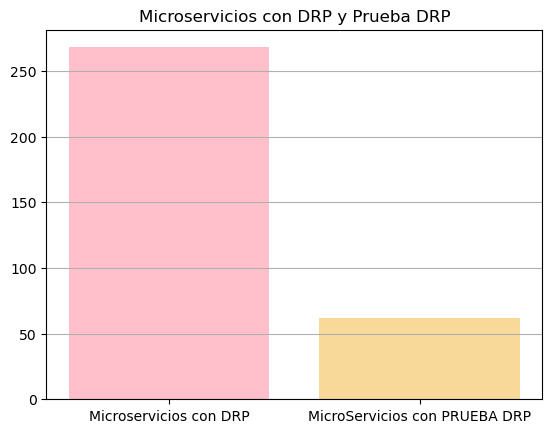

In [13]:
drp = data[data["DRP"]=="Si"].shape[0]
pruebaDRP = data[data["Prueba DRP"]=="SI"].shape[0]

etiquetas = ["Microservicios con DRP", "MicroServicios con PRUEBA DRP"]

fig, ax = plt.subplots()
ax.bar(etiquetas, [drp, pruebaDRP], color=["#FFC0CB","#f9d99a"])
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.title("Microservicios con DRP y Prueba DRP")
plt.show()

## Comparación Pocesos SIN DRP y Con prueba DRP

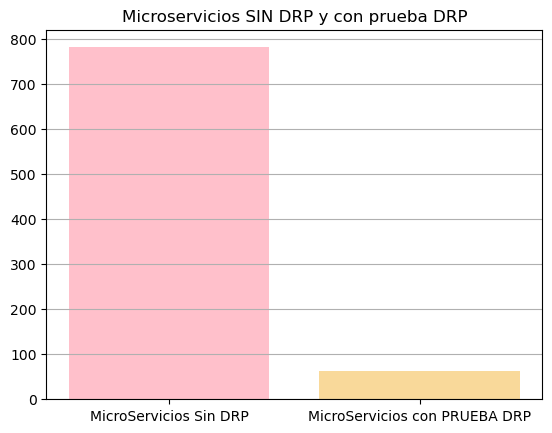

In [14]:
#Revisar si es posible esta combinación
drp = data[data["DRP"]=="No"].shape[0]
pruebaDRP = data[data["Prueba DRP"]=="SI"].shape[0]

etiquetas = ["MicroServicios Sin DRP", "MicroServicios con PRUEBA DRP"]

fig, ax = plt.subplots()
ax.bar(etiquetas, [drp, pruebaDRP], color=["#FFC0CB","#f9d99a"])
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.title("Microservicios SIN DRP y con prueba DRP")
plt.show()